# Pytraj, nglview: bring AmberTools to Python ecosystem

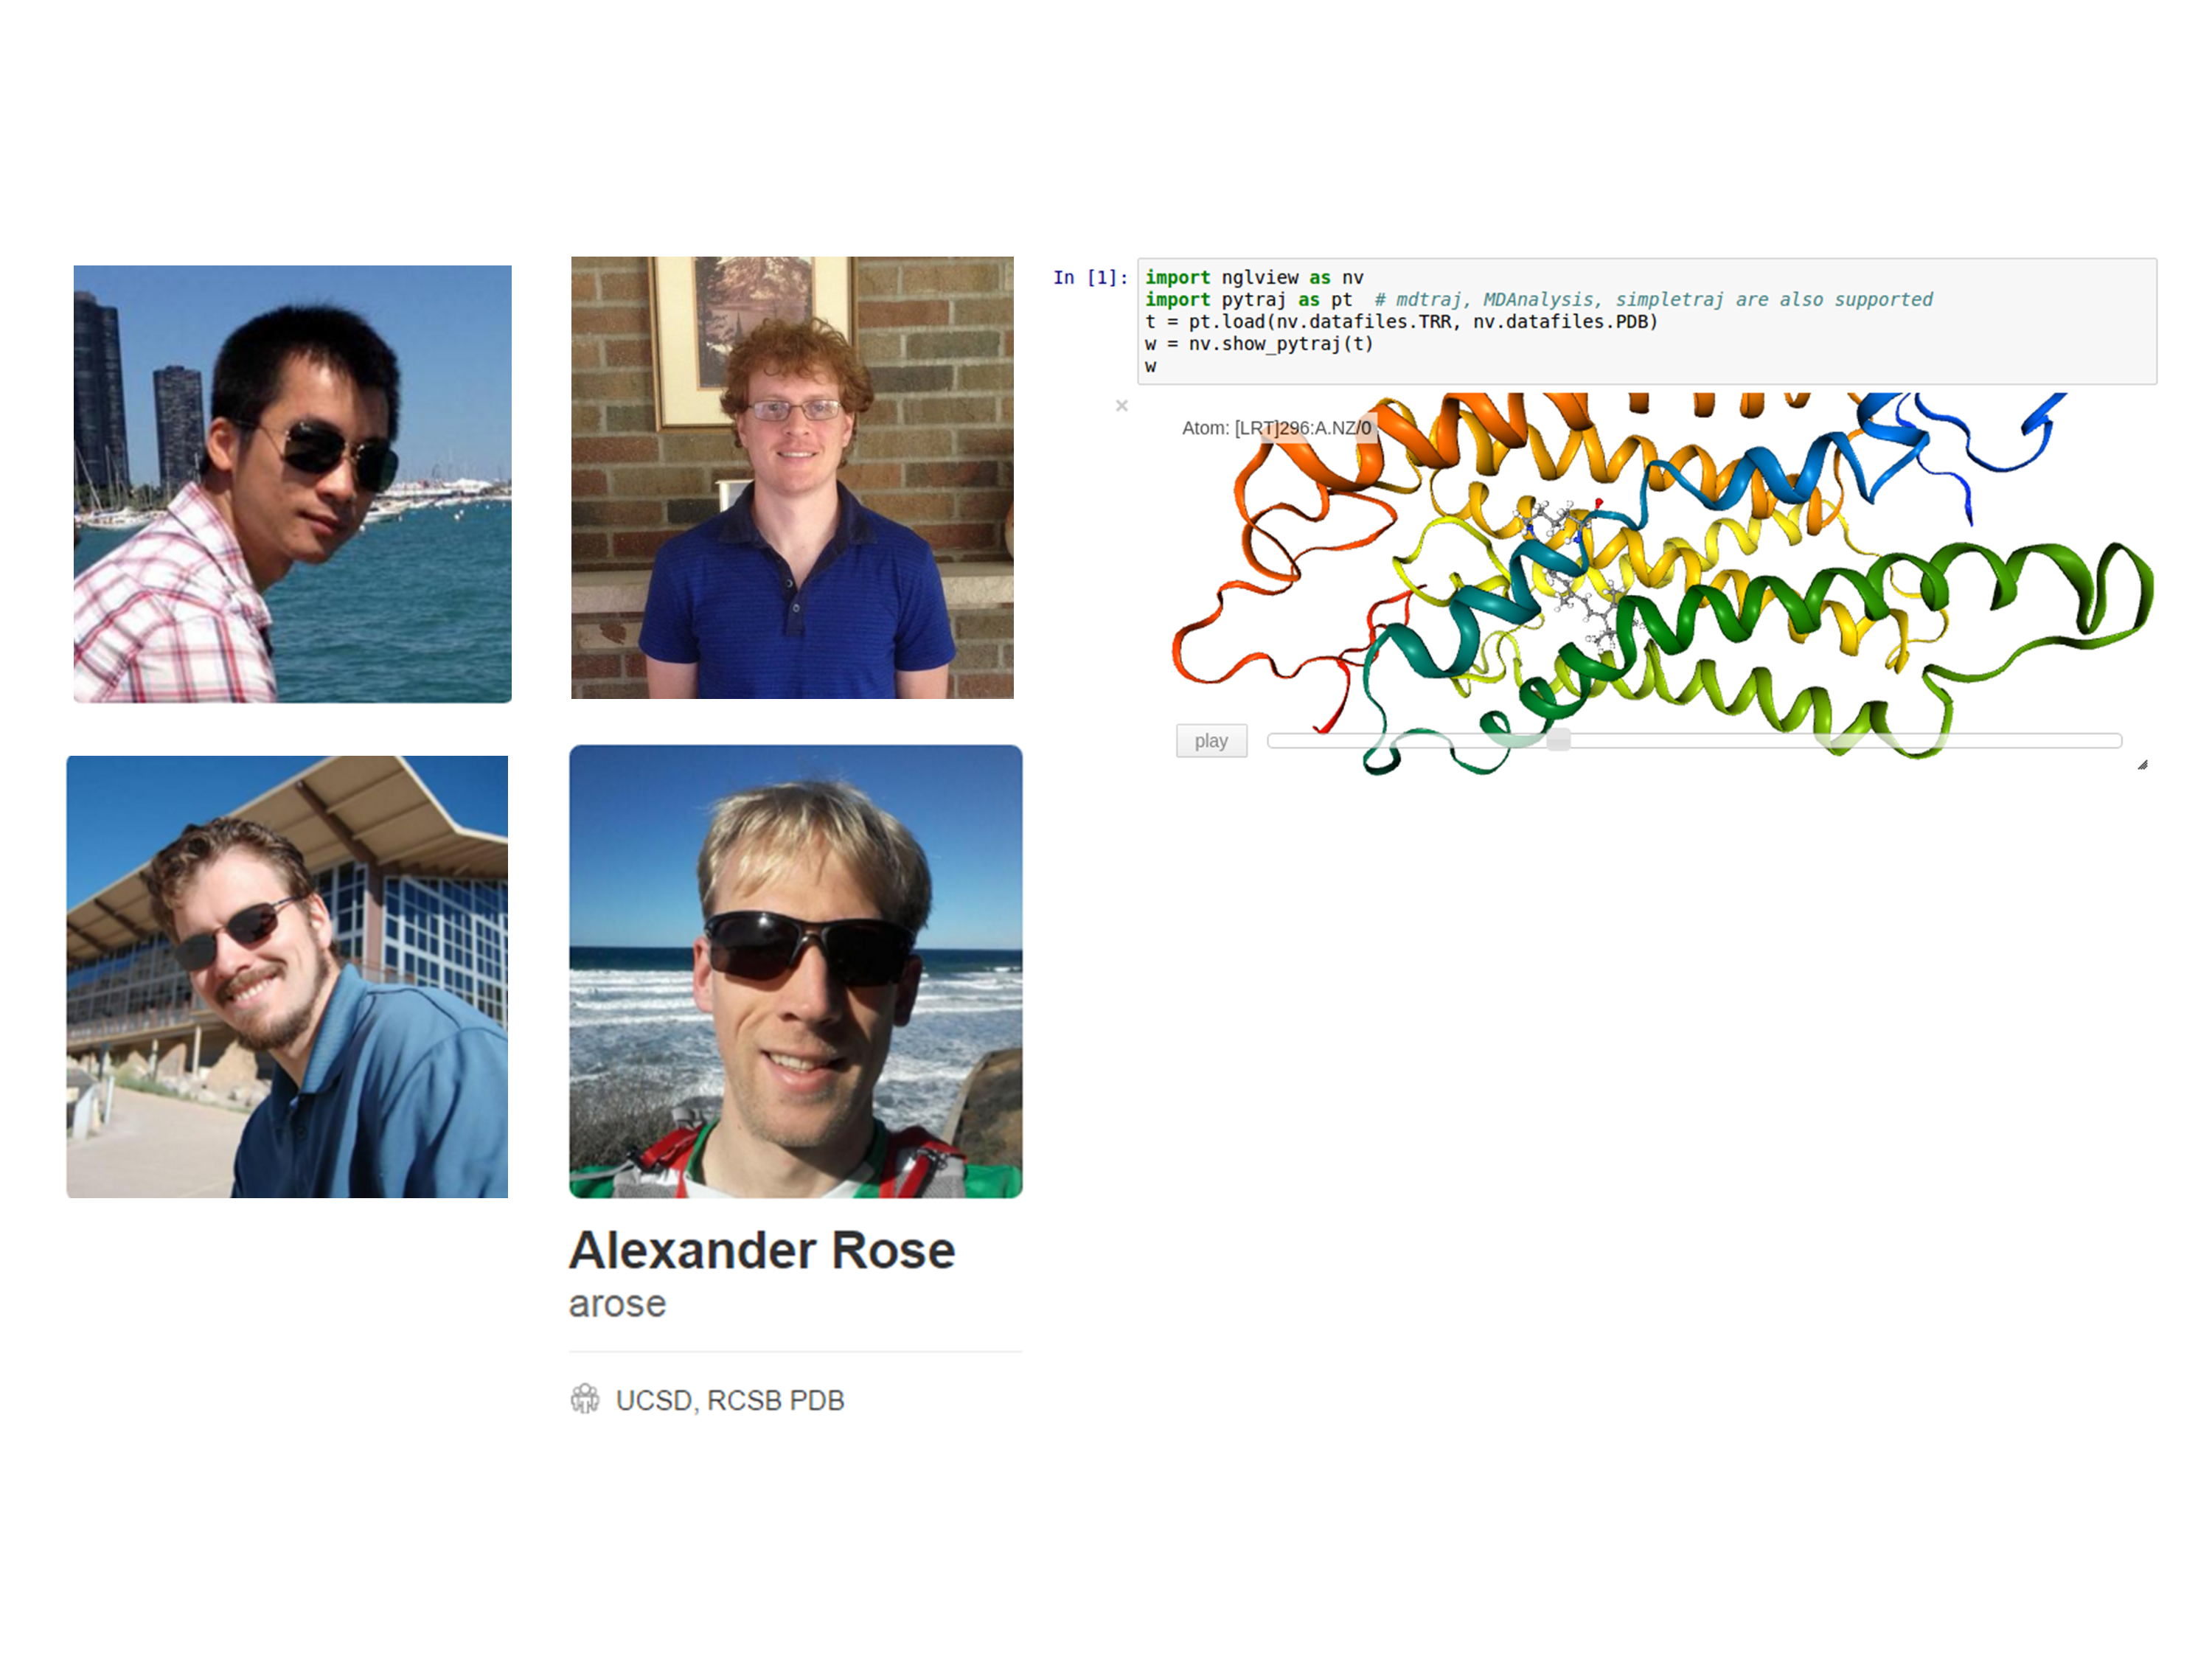

In [1]:
from IPython import display
display.Image('team.png', width=700)

# Workflow

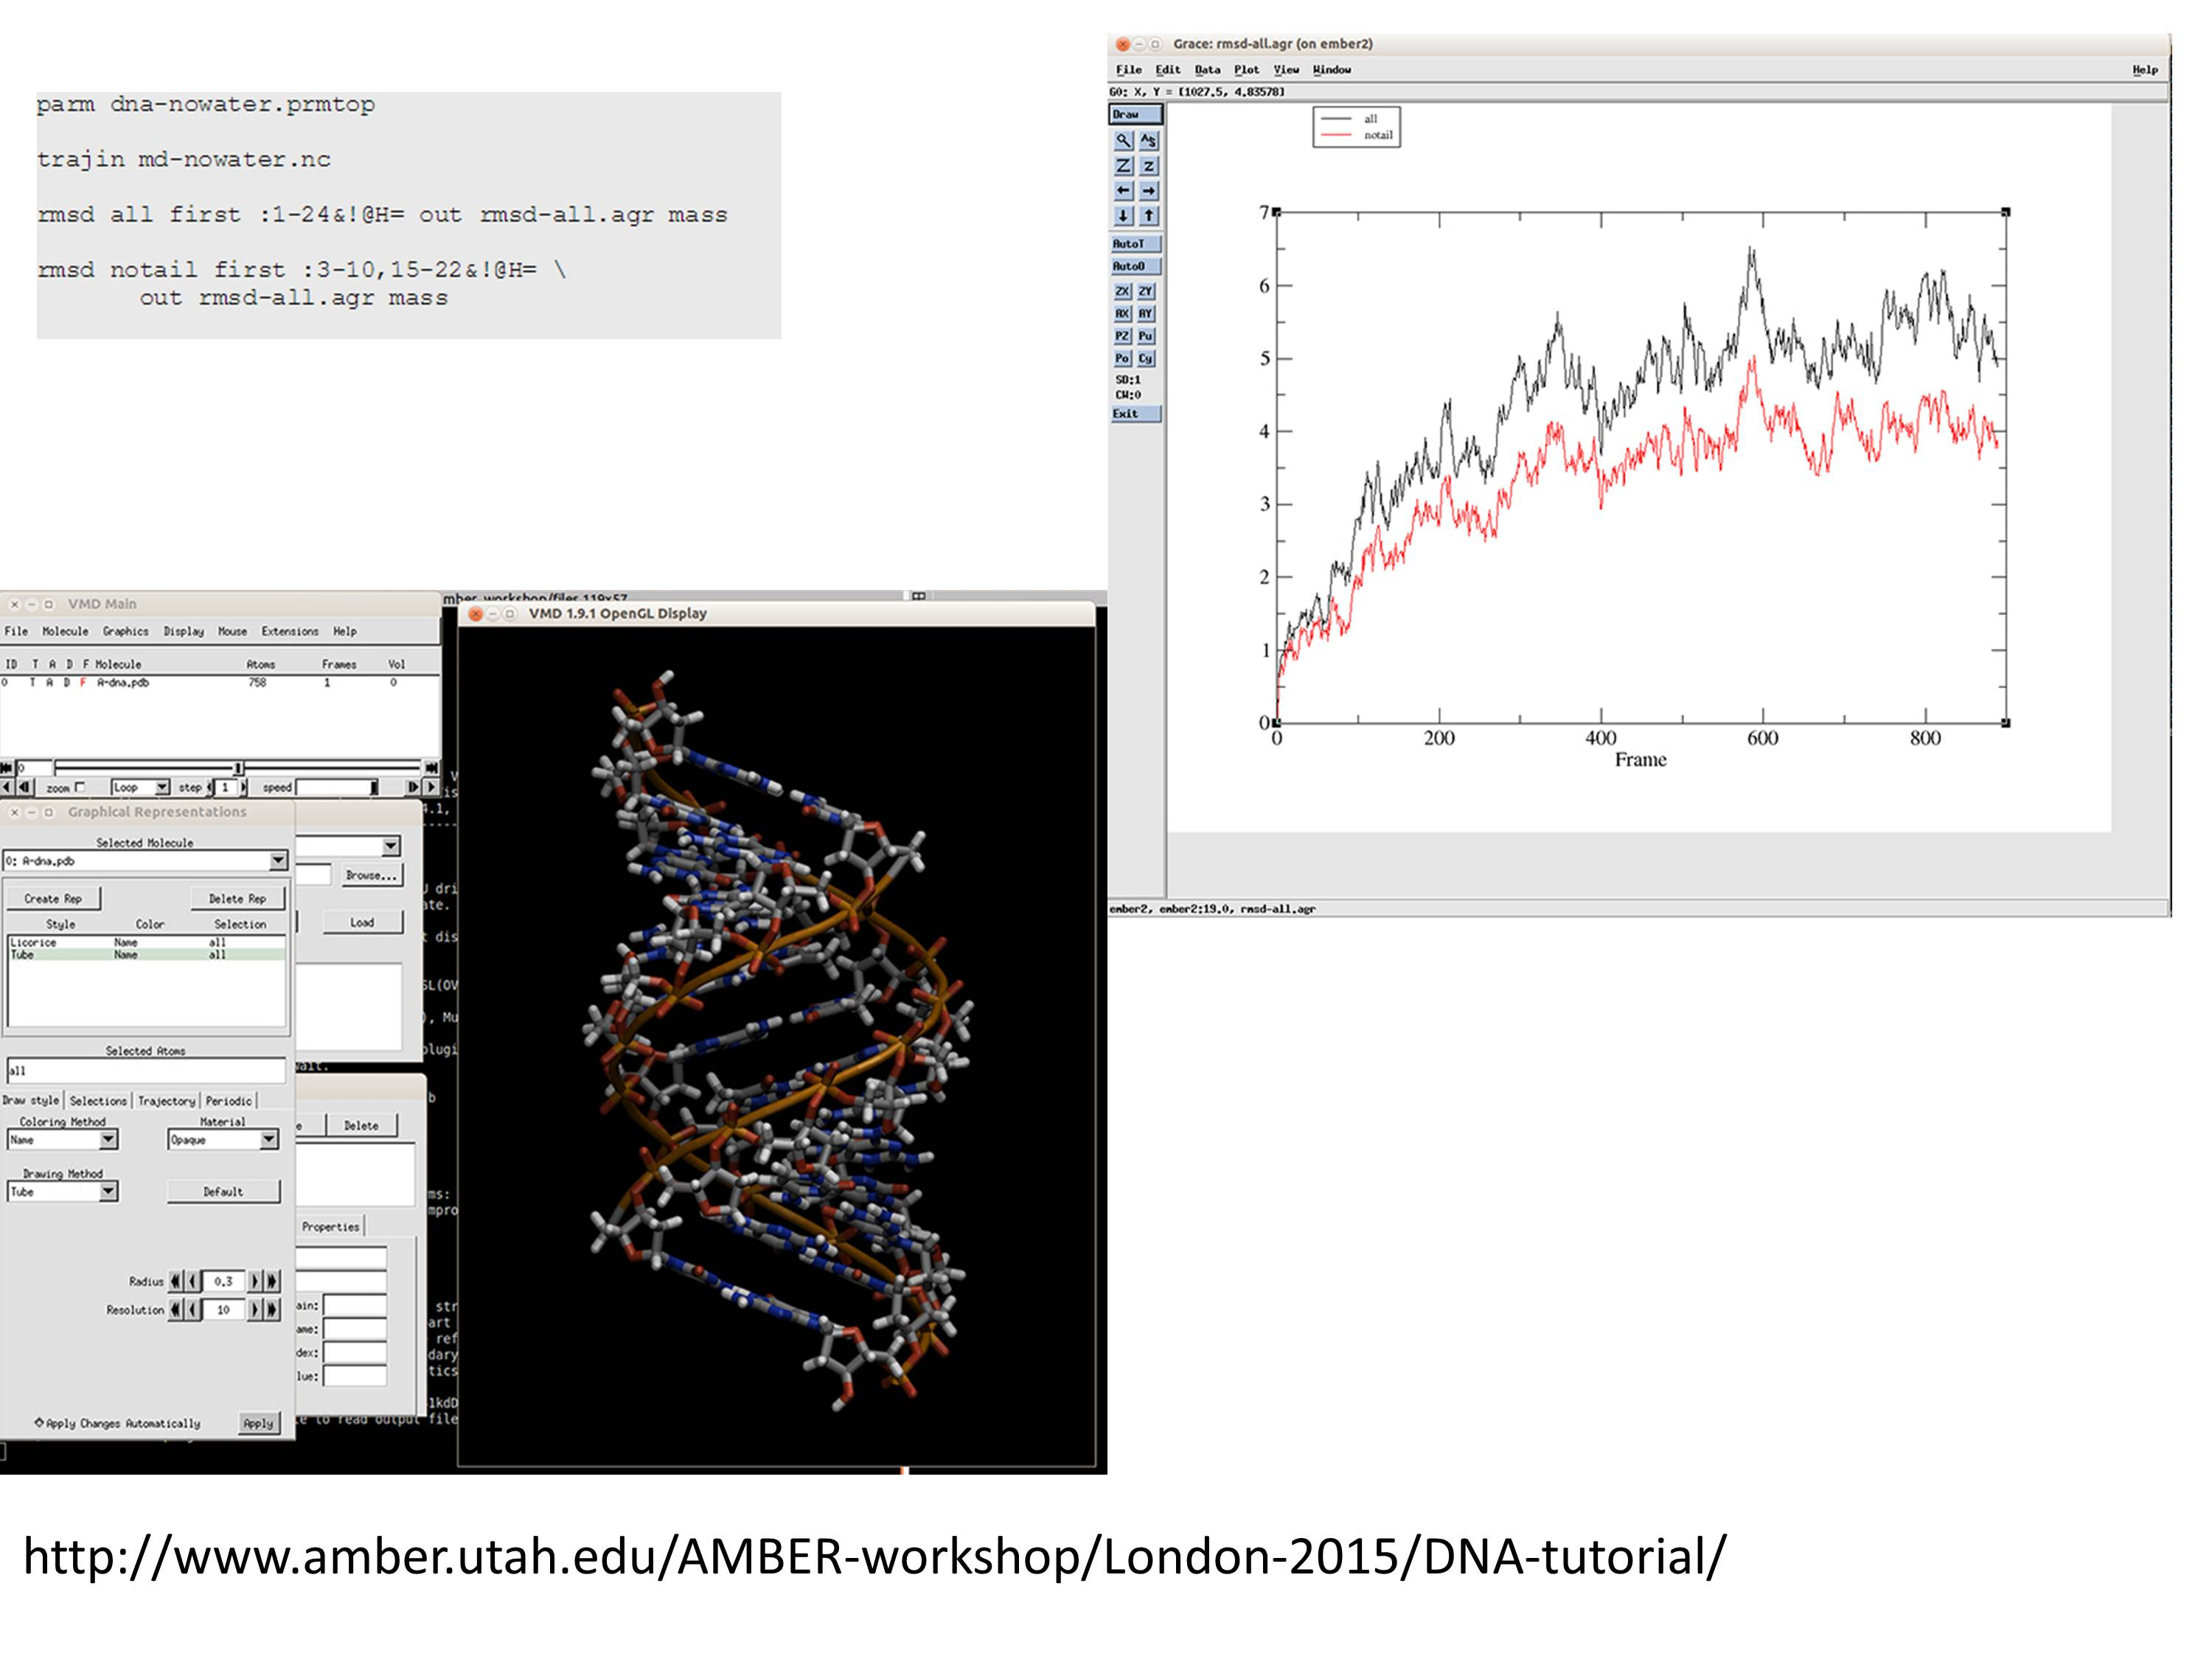

In [2]:
display.Image('./old_work_flow.jpg')

In [3]:
# data: http://www.amber.utah.edu/AMBER-workshop/London-2015/DNA-tutorial/
import pytraj as pt

traj0 = pt.load('md.nc', 'dna.prmtop')
traj0

pytraj.Trajectory, 831 frames: 
Size: 0.298563 (GB)
<Topology: 16074 atoms, 5144 residues, 5122 mols, PBC with box type = truncoct>
           

In [4]:
traj = traj0.autoimage()['!:WAT']
traj

pytraj.Trajectory, 831 frames: 
Size: 0.014488 (GB)
<Topology: 780 atoms, 46 residues, 24 mols, PBC with box type = truncoct>
           

In [5]:
# compute rmsd and convert raw data to pandas' DataFrame
data = pt.rmsd(traj, ref=0, mask=':1-14&!@H=', dtype='dataframe')
data.head(5)

RMSD_00001
0  4.959681e-07
1  6.372364e-01
2  6.766345e-01
3  7.819916e-01
4  9.697053e-01

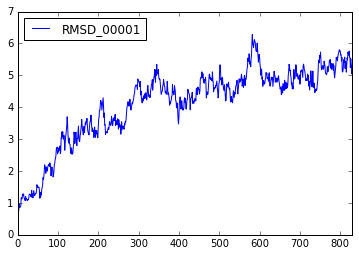

In [6]:
%matplotlib inline
data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aaad948eba8>]], dtype=object)

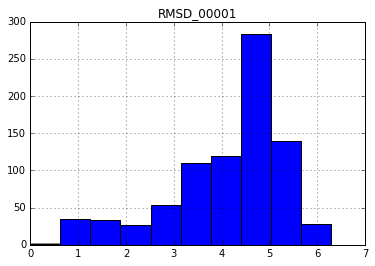

In [7]:
data.hist()

# Parallel

In [8]:
traj = pt.iterload('md.nc', 'dna.prmtop')
data = pt.pmap(pt.rmsd, traj, ref=0, mask=':1-14&!@H=', n_cores=8)

# serial: data = pt.rmsd(traj, ref=0, mask=':1-14&!@H=')

## Parallel scaling

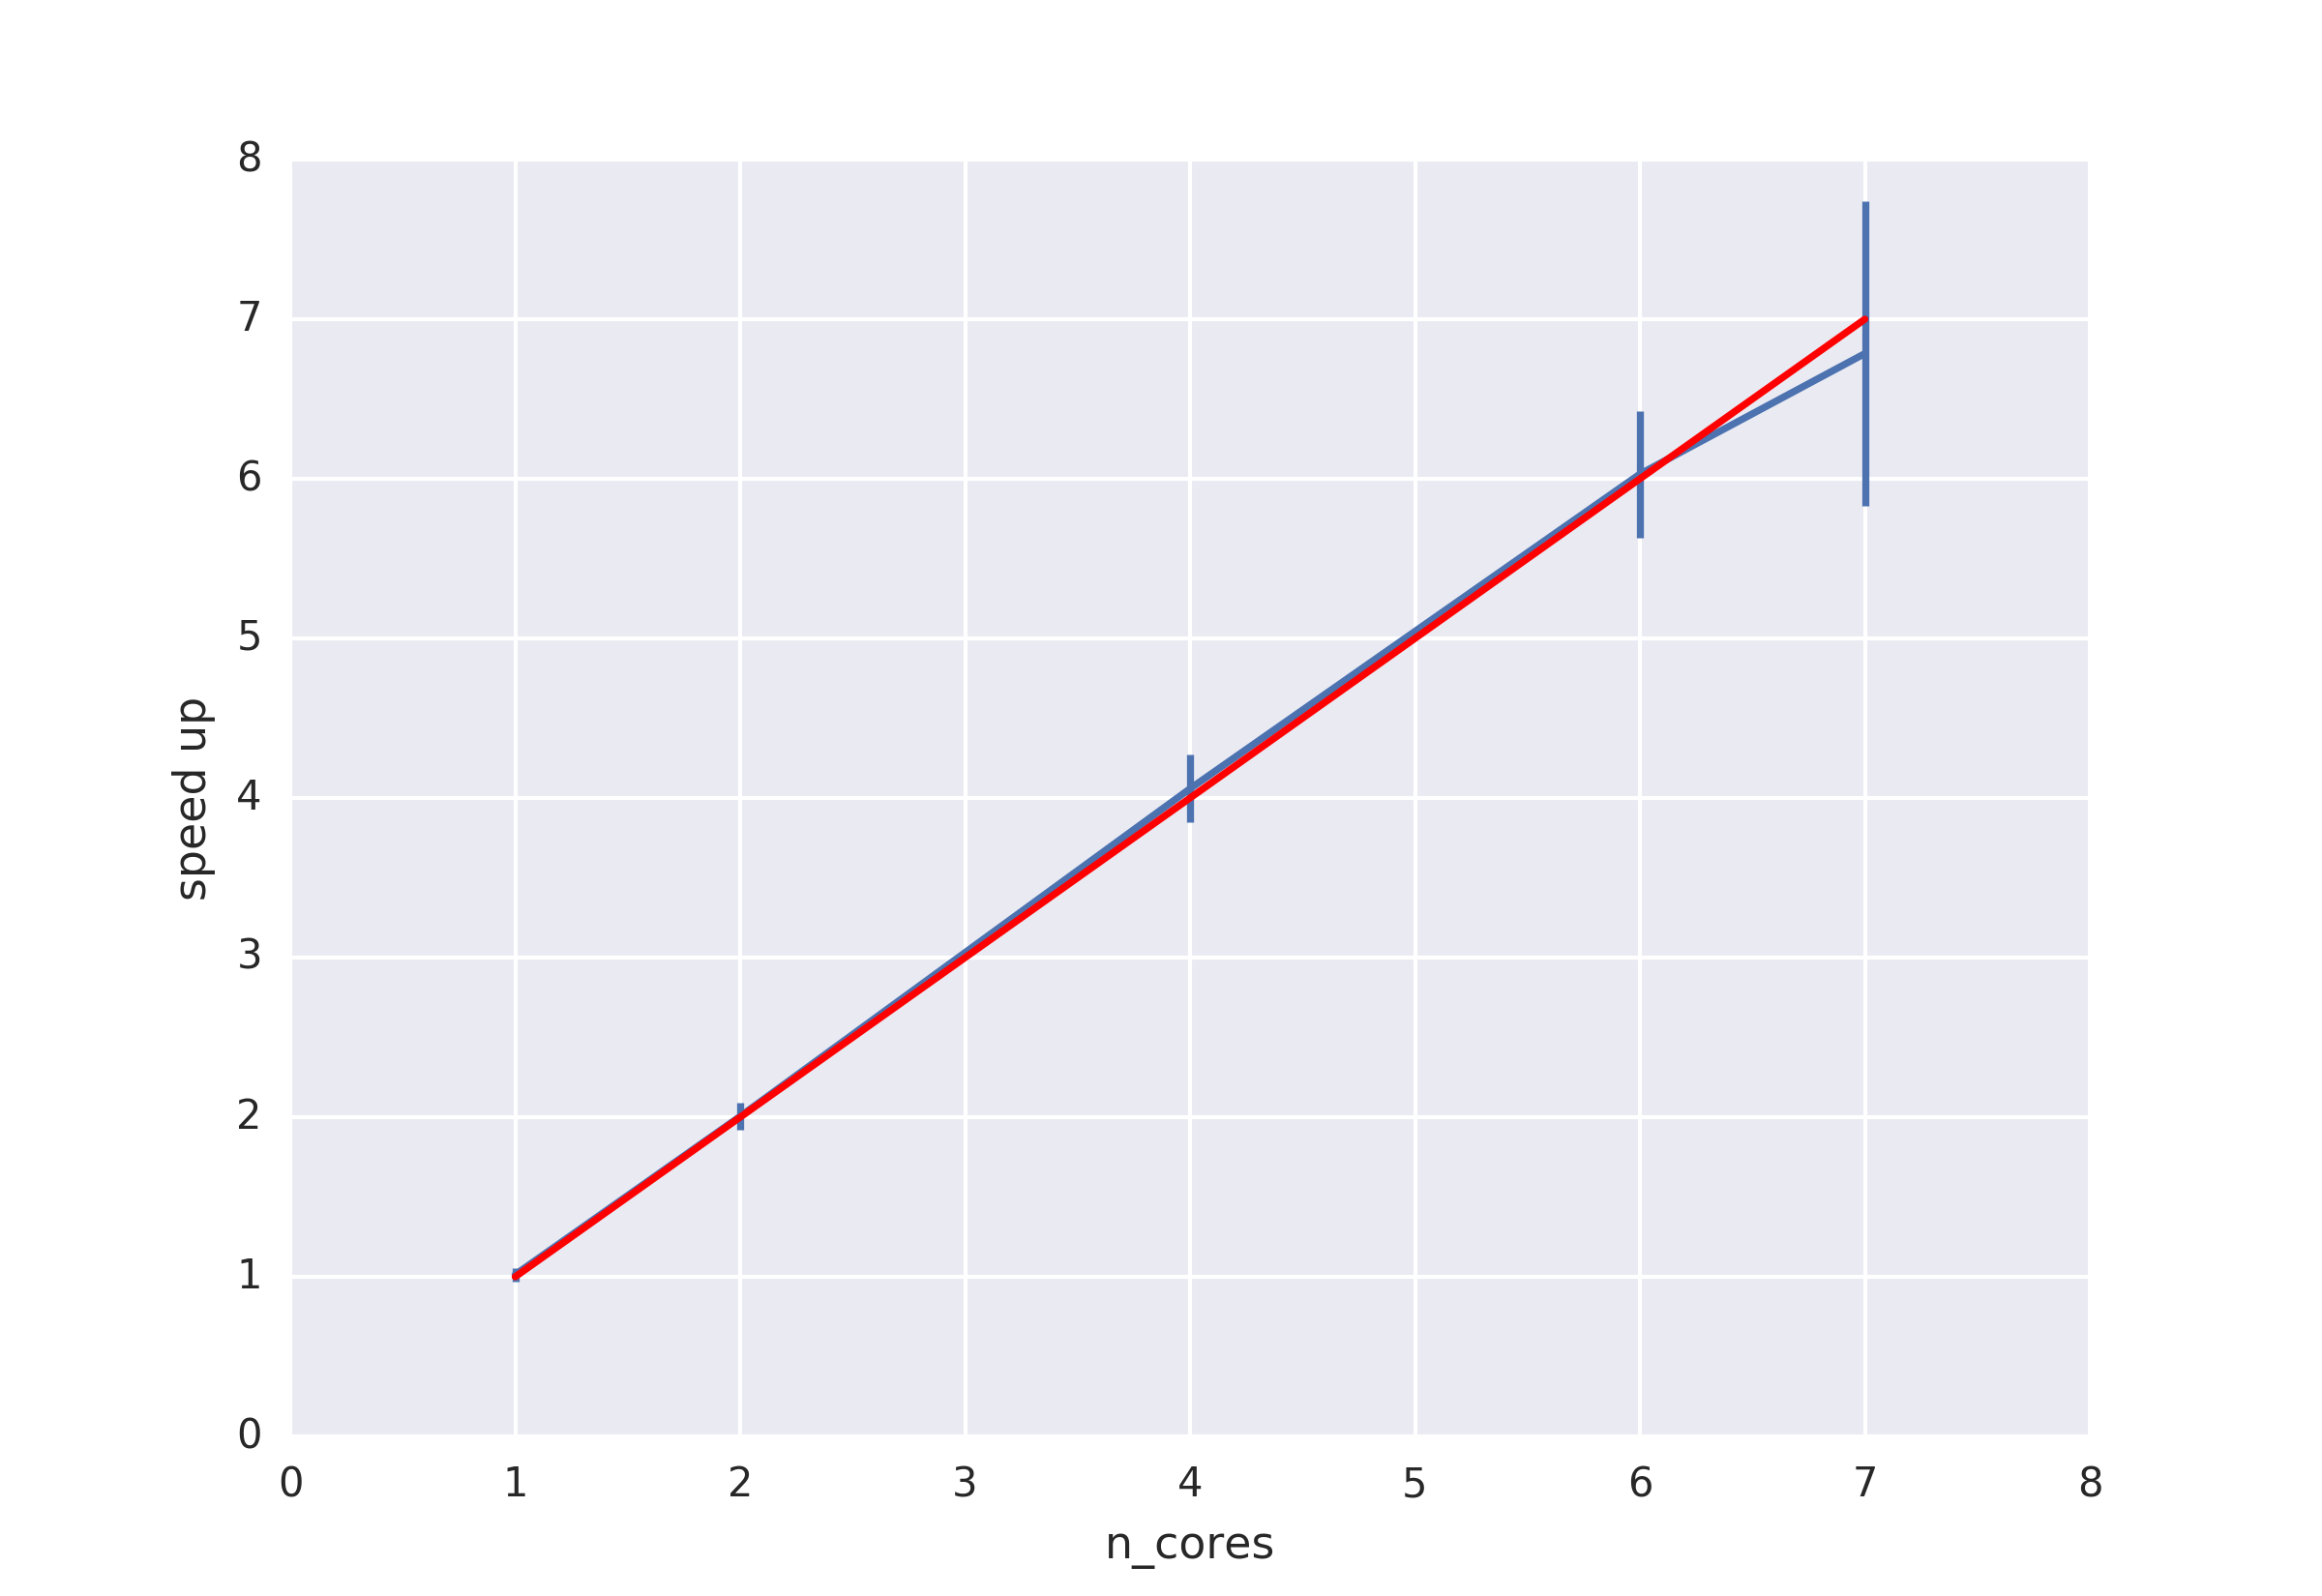

In [9]:
from IPython import display
display.Image('bench_pmap_casegroup.png', width=500)

# Intergrate will pysander (Python interface for sander)

In [10]:
traj2 = pt.iterload('tz2.nc', 'tz2.parm7')
energies = pt.energy_decomposition(traj2, igb=8, dtype='dataframe')
energies[['bond', 'angle', 'dihedral', 'gb']].head()

bond       angle    dihedral          gb
0  0.015314  128.545148  111.611329 -412.532664
1  0.013582  105.064945  105.392413 -400.090422
2  0.012521  103.520284   93.030850 -439.927013
3  0.016334   94.560780  105.522288 -400.956276
4  0.013338   99.508124  105.850222 -404.061030

# Support more file formats?

In [11]:
# XTC
import mdtraj as md

t0 = md.load('monolayer.xtc', top='monolayer.pdb')

coordinates = t0.xyz.astype('f8')
traj = pt.Trajectory(xyz=coordinates, top='monolayer.pdb')
pt.center_of_mass(traj)

array([[ 2.93015586,  2.60094379,  1.66991936],
       [ 3.01727943,  2.57976876,  1.59680848],
       [ 3.02472708,  2.57837296,  1.58989385],
       ..., 
       [ 3.0366626 ,  2.57732852,  1.5900617 ],
       [ 3.08111659,  2.58228309,  1.59082286],
       [ 3.08029504,  2.58351248,  1.58572677]])

# Document?

In [12]:
help(pt.calc_center_of_mass)

Help on function calc_center_of_mass in module pytraj.all_actions:

calc_center_of_mass(traj=None, mask='', top=None, dtype='ndarray', frame_indices=None)
    compute center of mass
    
    Examples
    --------
    >>> import pytraj as pt
    >>> traj = pt.datafiles.load_tz2()
    >>> # compute center of mass residue 3 for first 2 frames.
    >>> pt.calc_center_of_mass(traj(stop=2), ':3')
    array([[-0.661702  ,  6.69124347,  3.35159413],
           [ 0.5620708 ,  7.82263042, -0.72707798]])



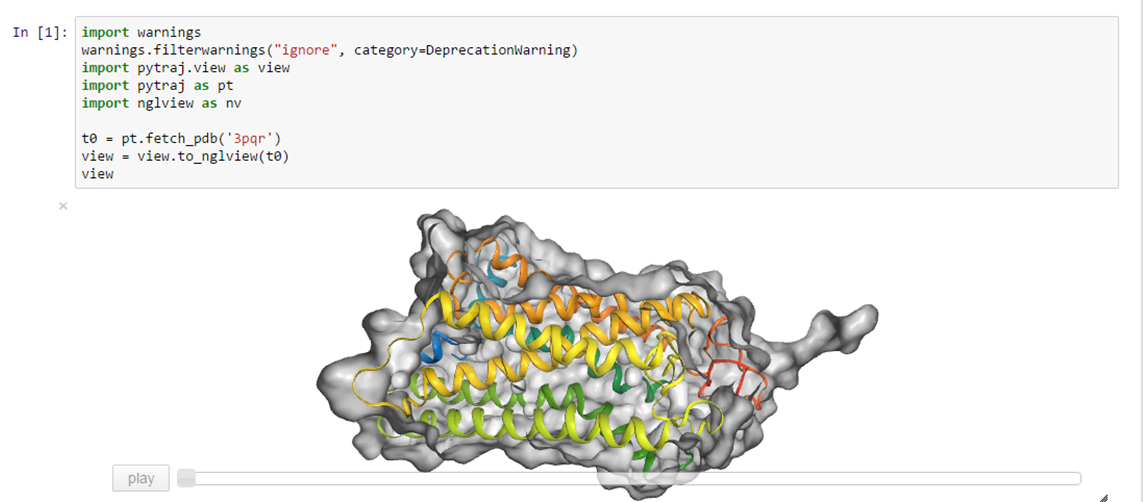

In [13]:
display.Image('./3pqr_nglview.png')

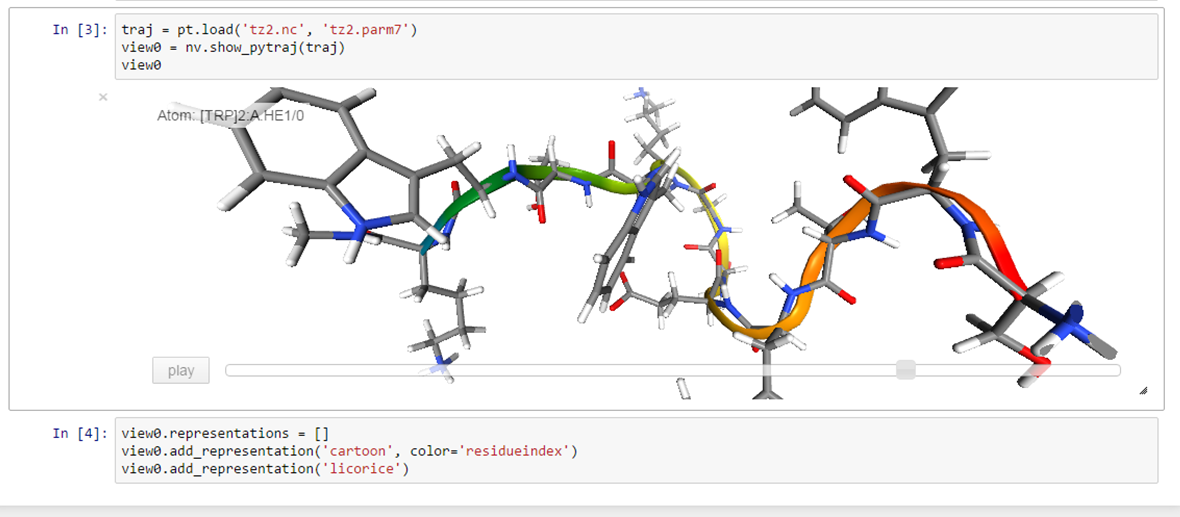

In [14]:
display.Image('./trpzip2_nglview.png')